In [2]:
%load_ext autoreload
%autoreload 2
    
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from Openseas_Methods import *
from pycoingecko import CoinGeckoAPI
from datetime import datetime,timedelta
import numpy as np
from scipy.stats import pearsonr
import pickle
import decision_tree as tree
from itertools import islice
from decision_tree import get_eth_price
from pymongo import MongoClient
from itertools import combinations

In [3]:
client = MongoClient()
db = client.NFTDB
collection_data = db.salesCollection
stats_collection = db.NFTStats
slug_collection = db.completedSlugs
combos = db.NFT
address_collection = db.addresstoNFT
skip_list=['ens','base-introduced','fundrop-pass','gemesis','apecoin','dai-stablecoin','uniswap','1inch-token']

In [8]:
len(listaddress_collection.find({'NFTs':{'$in':['milady']}})

2043

In [ ]:
with open('combo_per.pkl','rb') as f:
    combo_perc = pickle.load(f)
G = make_nft_graph(list(combo_perc.items()),skip_list=skip_list)
G2 = nx.Graph()
for node in tqdm(G.nodes()):
    records = list(address_collection.find({'NFTs':{'$in':[node]}}))
    addresses = [x['address'] for x in records]
    for comb in combinations(addresses, r=2):
        node1= comb[0]
        node2 = comb[1]
        if G2.has_edge(node1, node2):
            # If the edge exists, increment its weight
            G2[node1][node2]["weight"] += 1
        else:
            # If the edge doesn't exist, add it with the specified weight
            G2.add_edge(node1, node2, weight=1)
    
    
    

  1%|▋                                                                                                                           | 40/7357 [01:35<2:59:49,  1.47s/it]

In [19]:
milady = ['janklerz', 'neko-maker', 'ascii-milady', 'sproto-demons', 'pixeladymaker-bc', 'remixilated-babies', 'water-mililys', 'drifella', 'radbro-brazil', 'joseangel', 'remilio-babies', 'banners-nft', 'ohiolady-maker', 'radbro-webring-v1', 'angel-banners', 'heisei-milady-maker', 'hurt-hapas', 'conspiracy-lady-maker', 'brg-music-group', 'schizoposters', 'milaidys', 'pepe-maker', 'reservoir-dog', 'cigawrettepacks', 'ghibladymaker', 'goulerbros', 'oekakimaker', 'killady', 'muhlady', 'loveposters', 'remisans-inferno', 'meltydiary', 'miladmaker', 'trumplady-maker', 'matrix-milady', 'milady-2-global-terror', 'interkidz', 'remcotuners', 'remembrance-banners', 'bitladymaker', 'radbro-radcats', 'tuners-remco-gangs', 'reptilianbabies', 'negative-milady', 'slavbro-wee-bring-v2', 'milady', 'radhoe', 'mog-auras', 'radbro-webring', 'roritamakers1e2', 'sonoramaker', 'dadbrosv1', 'tlgame', 'meowlady-maker-2', 'pemuto', 'micent-van-gogh', 'pixeladymaker', 'molady', 'remiliangel', 'shiro-oh-i-see', 'remivision', 'milady-maker-party', 'mifairy-maker', 'bongler', 'sadbros95', 'desktops-nft', 'sneedmaker', 'milextasy', 'very-internet-poster', 'chuddies-melee', 'dadbros', 'janklerz-ex', 'chuddie', 'veryinternetperson', 'meowlady-maker', 'miladystationclassic', 'ultraviolence-kibbles', 'pixeladymaker-wotlk', 'miladystation']
G2 = nx.Graph()
for node in tqdm(milady):
    records = list(address_collection.find({'NFTs':{'$in':[node]}}))
    addresses = [x['address'] for x in records]
    for comb in combinations(addresses, r=2):
        node1= comb[0]
        node2 = comb[1]
        if G2.has_edge(node1, node2):
            # If the edge exists, increment its weight
            G2[node1][node2]["weight"] += 1
        else:
            # If the edge doesn't exist, add it with the specified weight
            G2.add_edge(node1, node2, weight=1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:41<00:00,  1.92it/s]


KeyboardInterrupt: 

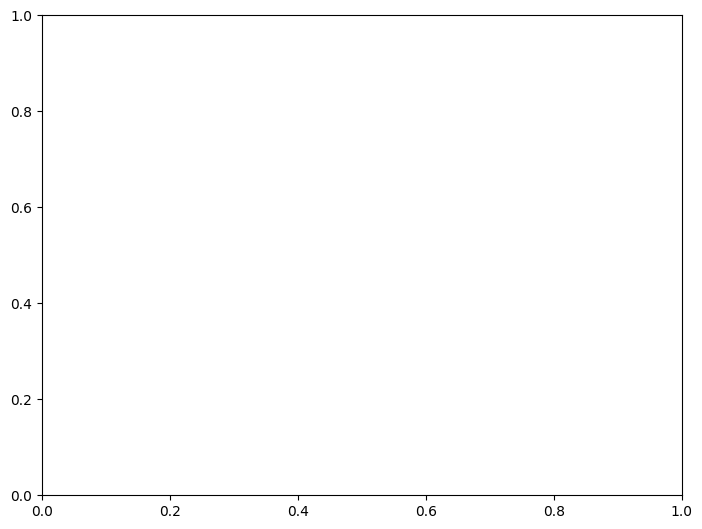

In [14]:
edges,weights = zip(*nx.get_edge_attributes(G2,'weight').items())
# pos =  nx.nx_agraph.graphviz_layout(G2, prog="neato")
nx.draw(
    G2, 
    # nodes
    node_size=2, node_color='k', linewidths=0, with_labels = False,# (linewidths of node markers)
    # edges
    edgelist = edges,
    width=weights

)

In [21]:
edges_to_remove = []
for u, v, data in G2.edges(data=True):
    if data['weight'] <= 1:
        edges_to_remove.append((u, v))

# Remove edges from the graph
G2.remove_edges_from(edges_to_remove)
print(G2)

Graph with 8301 nodes and 1669533 edges


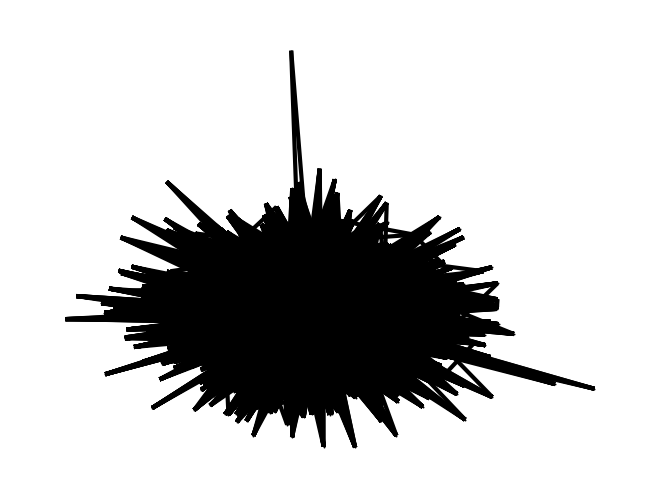

In [17]:
Gcc = sorted(nx.connected_components(G2), key=len, reverse=True)
G0 = G2.subgraph(Gcc[0])
edges,weights = zip(*nx.get_edge_attributes(G2,'weight').items())
# pos =  nx.nx_agraph.graphviz_layout(G2, prog="neato")
nx.draw(
    G0, 
    # nodes
    node_size=2, node_color='k', linewidths=0, with_labels = False,# (linewidths of node markers)
    # edges
    edgelist = edges,
    width=weights

)

In [18]:
from pyvis.network import Network
net = Network(notebook=True)
net.from_nx(G0)
net.show('test.html')

KeyboardInterrupt: 

In [22]:
nx.write_gexf(G2, "graph2.gexf")